In [ ]:
!pip install kaggle --upgrade
print ("writing kaggle")
!echo "{\"username\":\"benjykatz\",\"key\":\"572fb2bc0eb7cb591fc708326d55de5d\"}" > kaggle.json
!sudo mkdir -p ~/.kaggle
!sudo cp /content/kaggle.json ~/.kaggle/kaggle.json
print ("got kaggle json copied")
!chmod 600 /root/.kaggle/kaggle.json
!kaggle --version
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists



writing kaggle
got kaggle json copied
Kaggle API 1.5.16
100% 295k/295k [00:00<00:00, 861kB/s]
100% 295k/295k [00:00<00:00, 860kB/s]


In [ ]:
#Unzip the data
!unzip hr-analytics-job-change-of-data-scientists.zip

Archive:  hr-analytics-job-change-of-data-scientists.zip
  inflating: aug_test.csv            
  inflating: aug_train.csv           
  inflating: sample_submission.csv   


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('aug_train.csv')

In [ ]:
df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
#X = df.drop('target', axis=1)
X = df
y = df['target']

# Split the data into a training set (usually 70-80%) and a testing set (usually 20-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
hired = X_train[X_train['target']==1]
reject = X_train[X_train['target']==0]

Text(0, 0.5, 'frequency')

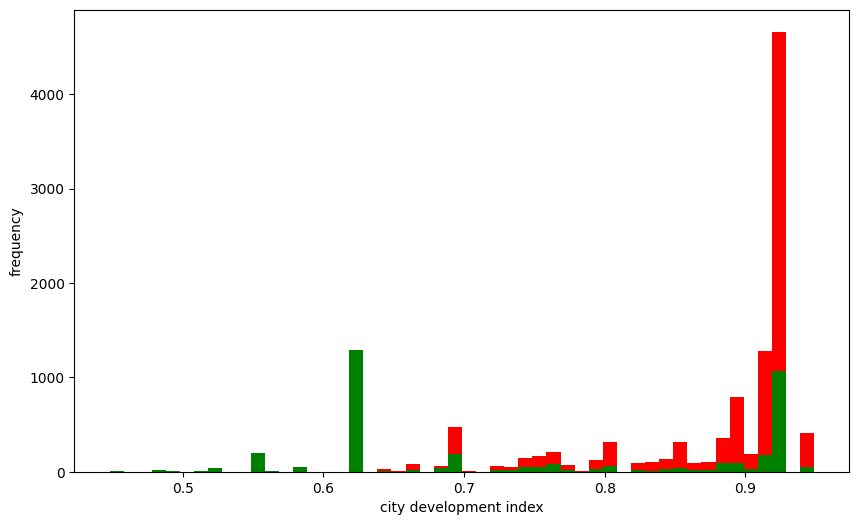

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
#plt.hist(hired['city_development_index'], bins = 50, label = 'hired', stacked = True, color = 'green')
plt.hist(reject['city_development_index'], bins = 50, label = 'rejected', stacked = True, color = 'red')
plt.hist(hired['city_development_index'], bins = 50, label = 'hired', stacked = True, color = 'green')
plt.xlabel('city development index')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

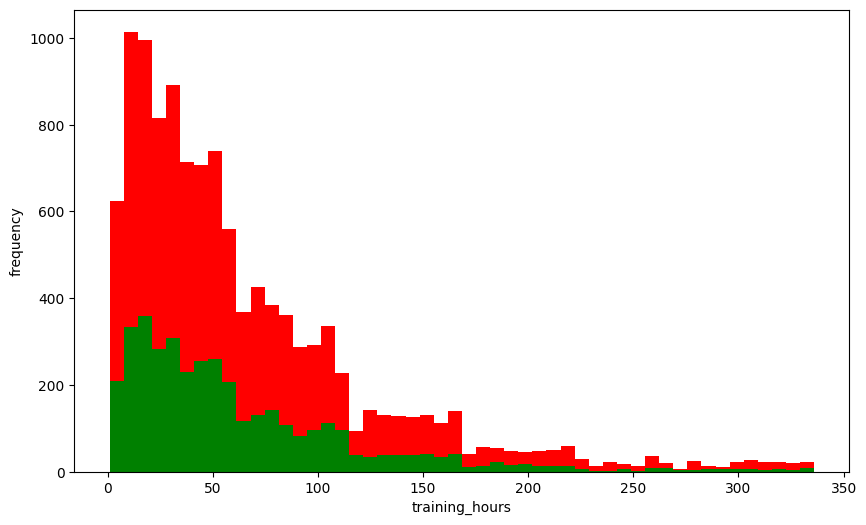

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
#plt.hist(hired['training_hours'], bins = 50, label = 'hired', stacked = True, color = 'green')
plt.hist(reject['training_hours'], bins = 50, label = 'rejected', stacked = True, color = 'red')
plt.hist(hired['training_hours'], bins = 50, label = 'hired', stacked = True, color = 'green')
plt.xlabel('training_hours')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

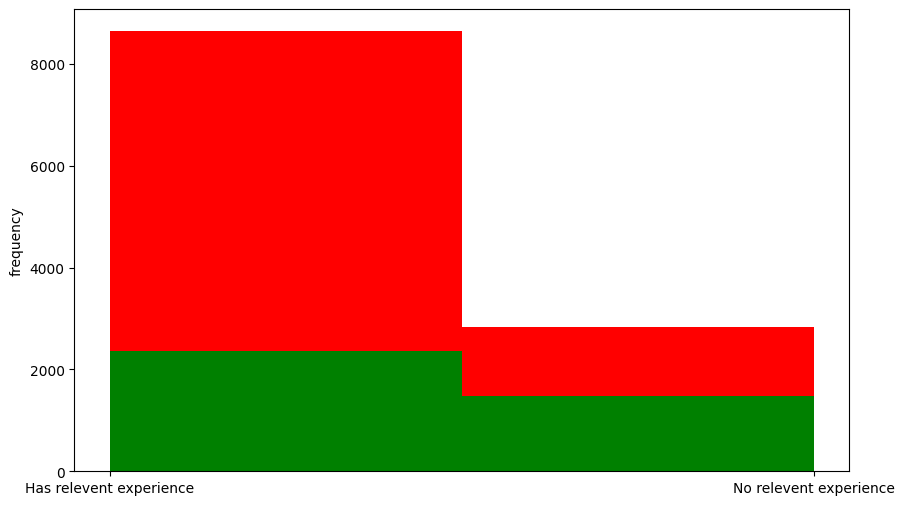

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.hist(reject['relevent_experience'], bins = 2, label = 'rejected', stacked = True, color = 'red')
plt.hist(hired['relevent_experience'], bins = 2, label = 'hired', stacked = True, color = 'green')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

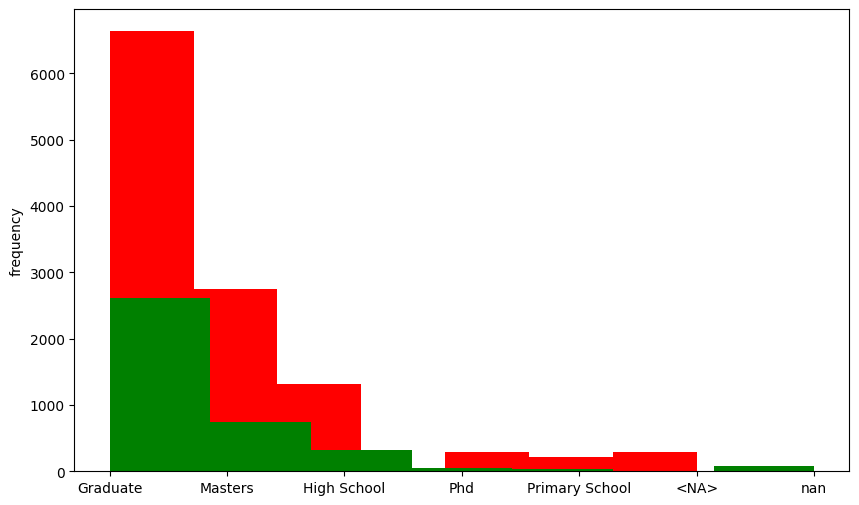

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
reject = reject.astype({'education_level': str})
hired = hired.astype({'education_level': str})
plt.hist(reject['education_level'], bins = 7, label = 'rejected', color = 'red')
plt.hist(hired['education_level'], bins = 7, label = 'hired', color = 'green')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

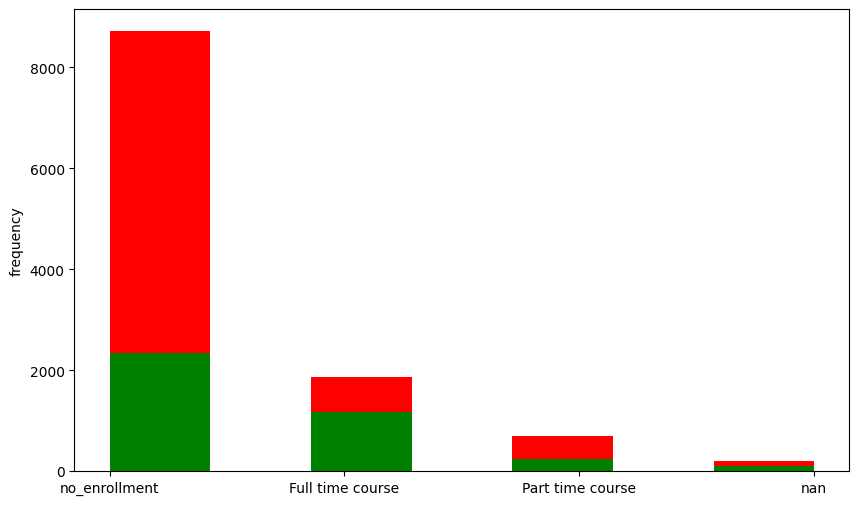

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
reject = reject.astype({'enrolled_university': str})
hired = hired.astype({'enrolled_university': str})
plt.hist(reject['enrolled_university'], bins = 7, label = 'rejected', color = 'red')
plt.hist(hired['enrolled_university'], bins = 7, label = 'hired', color = 'green')
plt.ylabel('frequency')


Text(0, 0.5, 'frequency')

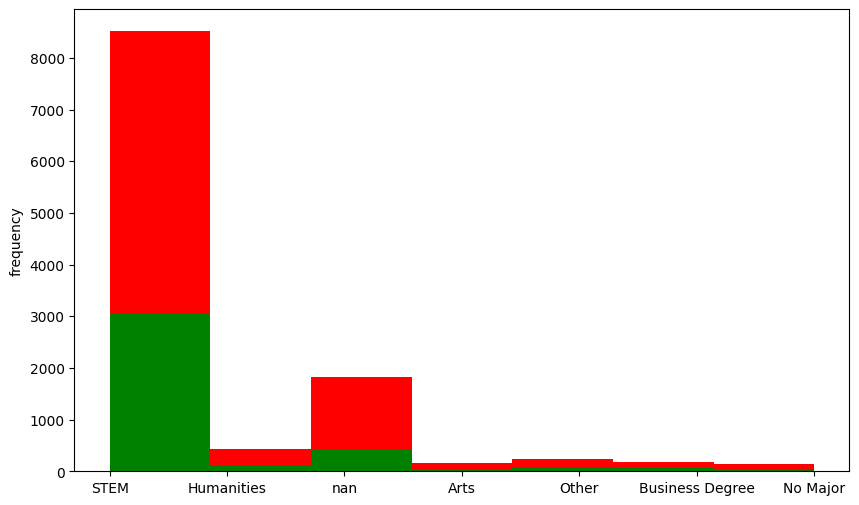

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
reject = reject.astype({'major_discipline': str})
hired = hired.astype({'major_discipline': str})
plt.hist(reject['major_discipline'], bins = 7, label = 'rejected', color = 'red')
plt.hist(hired['major_discipline'], bins = 7, label = 'hired', color = 'green')
plt.ylabel('frequency')


Simple Huristic:
We will extremly likely to hear back from people who live in low developed cities.

We are fairly likely to hear back from someone with no relevant experience

We are very likely to hear back from someone in a full time courses

We are likely to hear from a graduate

we are likely to hear from stem

In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
def get_score(candidate):
  points = 0
  if(candidate['city_development_index']<0.65):
    points = points+7
  if(candidate['relevent_experience']=='No relevent experience'):
    points = points+2
  if(candidate['enrolled_university']=='Full time course'):
    points = points+3
  if(candidate['education_level']=='Graduate'):
    points = points+1
  if(candidate['major_discipline']=='STEM'):
    points = points+1
  #print(points)
  return points

In [ ]:
#hired scored
scores = {}
scores = (hired.apply(get_score, axis=1))

print(sum(scores)/len(scores))
#is a 6.1 on average

6.146760343481655


In [ ]:
#rejected scores
scores = {}
scores = (reject.apply(get_score, axis=1))

print(sum(scores)/len(scores))
#is a 3 on average

3.0076635025690153


In [ ]:
predictions = (X_test.apply(get_score, axis=1)>5)
print(predictions)

10072     True
10895    False
12129    False
8472     False
6400      True
         ...  
5741     False
2409     False
7037     False
5015     False
16185    False
Length: 3832, dtype: bool


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: "+str(accuracy))
precision = precision_score(y_test, predictions)
print("Precision: "+str(precision))
recall = recall_score(y_test, predictions)
print("Recall: "+str(recall))


Accuracy: 0.7669624217118998
Precision: 0.5230078563411896
Recall: 0.4989293361884368


In [ ]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [ ]:
df_clean = pd.get_dummies(df)

In [ ]:
df_clean.head()

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,36,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,29725,0.776,47,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,11561,0.624,83,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,33241,0.789,52,1.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,666,0.767,8,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
for col in df_clean:
  print(col)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
X = df_clean.drop('target', axis=1)
y = df_clean['target']

# Split the data into a training set (usually 70-80%) and a testing set (usually 20-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [ ]:
print(X_train)

In [ ]:
model = Sequential([
    Dense(60, activation='relu', input_dim=X_train.shape[1]),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 70, validation_split= 0.15)


Epoch 1/70
408/408 [==============================] - 5s 9ms/step - loss: 21.9243 - accuracy: 0.6328 - val_loss: 0.6187 - val_accuracy: 0.7486
Epoch 2/70
408/408 [==============================] - 2s 5ms/step - loss: 11.1883 - accuracy: 0.6391 - val_loss: 20.7796 - val_accuracy: 0.7468
Epoch 3/70
408/408 [==============================] - 2s 4ms/step - loss: 8.3624 - accuracy: 0.6478 - val_loss: 6.0743 - val_accuracy: 0.7464
Epoch 4/70
408/408 [==============================] - 2s 4ms/step - loss: 8.4914 - accuracy: 0.6410 - val_loss: 7.8932 - val_accuracy: 0.7468
Epoch 5/70
408/408 [==============================] - 2s 5ms/step - loss: 6.4066 - accuracy: 0.6477 - val_loss: 13.3344 - val_accuracy: 0.7473
Epoch 6/70
408/408 [==============================] - 3s 7ms/step - loss: 6.8671 - accuracy: 0.6496 - val_loss: 9.6738 - val_accuracy: 0.7464
Epoch 7/70
408/408 [==============================] - 4s 10ms/step - loss: 6.2988 - accuracy: 0.6571 - val_loss: 7.7834 - val_accuracy: 0.7460
E

In [ ]:
met = model.evaluate(X_test, y_test, return_dict = True)
print(met)


120/120 [==============================] - 0s 2ms/step - loss: 1.8637 - accuracy: 0.7555
{'loss': 1.8637136220932007, 'accuracy': 0.755480170249939}


In [ ]:
prob = model.predict(X_test)

predictions = (prob > .5).astype(int)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: "+str(accuracy))
precision = precision_score(y_test, predictions)
print("Precision: "+str(precision))
recall = recall_score(y_test, predictions)
print("Recall: "+str(recall))


120/120 [==============================] - 0s 1ms/step
Accuracy: 0.7554801670146137
Precision: 0.5
Recall: 0.008537886872998933
